# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 08__

__Nombres de los estudiantes: Lubin Ye y Ziteng Huang__

In [1]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [2]:
import pandas as pd

"""

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

"""

df = pd.read_csv('/content/drive/MyDrive/Colab/P2/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [3]:
# Obtenemos la descripción de las variables (medias, desviaciones típicas, rangos, ...)
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [ ]:
# Obtenemos la correlación entre las variables numericas

df.corr()

# Podemos comentar que la correlación es una medida estadística que describe la relación entre dos variables.
# Los valores de la matriz de correlación varían entre -1 y 1:
# 1: Correlación positiva perfecta, son directamente proporcionales.
# 0: No hay correlación.
# -1: Correlación negativa perfecta, son inversamente proporcionales.

<ipython-input-7-41e45f73ff7c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
# Utilizamos y=1.02 para asegurarnos de que el título superior no se superponga con los subgráficos y esté ligeramente separado de ellos.
plt.suptitle('Diagrama de Dispersión de Variables Numéricas', y=1.02)
plt.show()

# Este diagrama de dispersión nos muestra cómo cambia una variable en función de otra, permitiendo identificar patrones, tendencias y posibles correlaciones entre ellas
# Por ejemplo, vemos que la longitud y la latitud están inversante relacionadas, ya que mientras la latitud aumenta (norte), la longitud disminuye (oeste), es decir, son inversamente proporcionales
# Luego, podemos mencionar las siguientes variables que son directamente proporcionales:
# 1. Numero total de habitaciones - Numero de total de dormitorios
# 2. Population - households
# 3. Households - Numero total de habitaciones

# En el resto de variables, es difícil establecer algún tipo de correlación ya que en su mayoría o bien se da el caso de datos variopintos en donde hay valores muy distintos de todo tipo para ambas variables, lo cual no permite establecer ninguna correlación o para cualquier valor de una variable,
# el valor de la otra variable se mantiene mas o menos constante, es el caso de population - latitude, population - longitude, population - median_income, population - median-house-value

Output hidden; open in https://colab.research.google.com to view.


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

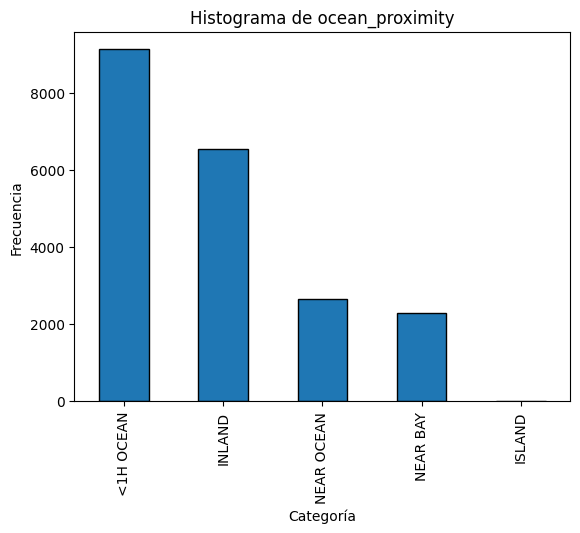

In [ ]:
import matplotlib.pyplot as plt

# Obtenemos la columna 'ocean_proximity' del DataFrame df
df['ocean_proximity'].value_counts().plot(kind='bar', edgecolor='black')

plt.title('Histograma de ocean_proximity')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

# Vemos que el valor '<1H OCEAN' es el de mayor frecuencia por lo que deducimos que influye en los resultados

## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [4]:
# Prueba 2

# Nuestro objetivo es agrupar las casas atendiendo a la zona residencial a partir de las variables independientes de la zona geografica, para poder ver así en el diagrama de dispersion resultante con eje x longitude y eje y latitude,
# la correlacion con los ejes y si forman de alguna forma zonas residenciales fijadas por las coordenadas dependientes de determinadas variables

# Vamos a prescindir de aquellas variables que tengan un coeficiente de relación alto, es decir, |coe| cercano a 1. Vamos a dejar por tanto, unicamente
# aquellos valores que sean distintos entre sí para tener una solución que englobe más a las distintas variables y prescindir de aquellas que se parezcan al resto

from sklearn.preprocessing import StandardScaler

# 1) Dejamos solo las variables que tienen una correlación baja entre sí, ya que las que son parecidas aportan informacion redundante.
# 2) Elegimos prescindir tamibién de longitude y latitude porque al ser unicamente coordenadas van a sesgar el diagrama de dispersion final y hara que se repartan por zonas lo cual no es lo que queremos.
subset_cols = ['housing_median_age', 'total_rooms', 'median_income', 'median_house_value','population']

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Vamos a preprocesar los datos mediante estandarización usando StandardScaler para transformar los datos para que tengan una media de cero y una desviación estándar de uno y que estén a la misma escala
# ya que hay datos con una magnitud mucho mayor que podría influir de forma desproporcional en el diagrama de dispersión
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_subset)

# Convertir los datos preprocesados en un nuevo DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=subset_cols)
# df_scaled.fillna(0, inplace=True)

# Mostrar el nuevo DataFrame con los datos preprocesados
print(df_scaled)


       housing_median_age  total_rooms  median_income  median_house_value  \
0                0.982143    -0.804819       2.344766            2.129631   
1               -0.607019     2.045890       2.332238            1.314156   
2                1.856182    -0.535746       1.782699            1.258693   
3                1.856182    -0.624215       0.932968            1.165100   
4                1.856182    -0.462404      -0.012881            1.172900   
...                   ...          ...            ...                 ...   
20635           -0.289187    -0.444985      -1.216128           -1.115804   
20636           -0.845393    -0.888704      -0.691593           -1.124470   
20637           -0.924851    -0.174995      -1.142593           -0.992746   
20638           -0.845393    -0.355600      -1.054583           -1.058608   
20639           -1.004309     0.068408      -0.780129           -1.017878   

       population  
0       -0.974429  
1        0.861439  
2       -0.8207

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Número óptimo de clusters: 5


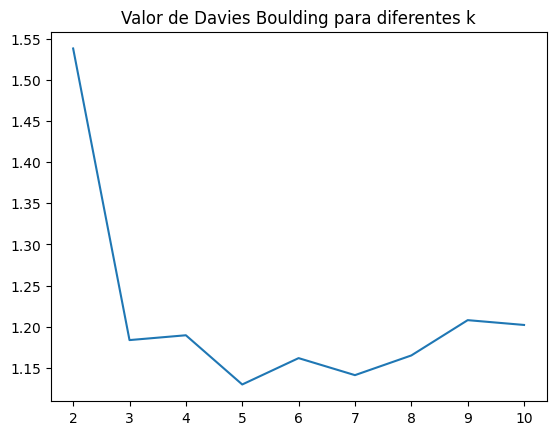

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Definimos el rango de número de clusters entre 2 y 10, ya que no nos interea tener un numero excesivo de clusters
k_range = range(2, 11)

# Lista para almacenar los resultados del índice davies_bouldin
db_scores = []

# Iterar sobre el rango de número de clusters
for k in k_range:
    # Inicializar y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(df_scaled)

    # Calcular el índice davies_bouldin y almacenarlo en la lista
    db_score = davies_bouldin_score(df_scaled, kmeans.labels_)
    db_scores.append(db_score)

plt.plot(k_range, db_scores)
plt.title("Valor de Davies Boulding para diferentes k")

# Encontrar el número óptimo de clusters con el índice más bajo
optimal_clusters = k_range[db_scores.index(min(db_scores))]
print("Número óptimo de clusters:", optimal_clusters)


In [ ]:
# Obtenemos como numero optimo de clusters = 5. No obstante, nosotros usaremos optimal_clusters = 3, ya que tras ver los resultados el hecho de dividir los clusters en 5 es innecesario por las razones que se detallan en los apartados siguientes.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Definimos que el numero optimo de clusters es 3, ya que con 4 o 5 clusters lo unico que se consigue es diseccionar clusters en más clusters, que ya eran pertenecientes a una categoría (zona residencial) concreta.
# Es decir, el hecho de aumentar el numero de clusters no ayuda más a la interpretación de nuestros datos, sino que lo único que hace es separar un clúster de forma inncesaria, ya que la diferencia entre los clusters separados no es muy grande.

optimal_clusters = 3

# Seleccionar un subconjunto de variables relevantes para el clustering
subset_cols = ['housing_median_age', 'total_rooms', 'median_income', 'median_house_value','population']

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Preprocesar los datos si es necesario
# En este caso, suponemos que los datos ya están escalados

# Inicializar y ajustar el modelo KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df_scaled)

# Asignar las etiquetas de clusters al conjunto de datos original
df['cluster_label'] = kmeans.labels_

# Describir los clusters
cluster_stats = df.groupby('cluster_label').describe()[subset_cols]

# Mostrar los descriptores estadísticos de cada cluster
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    cluster_stats = cluster_data[subset_cols].describe()

    # Mostrar la tabla de descriptores estadísticos para cada cluster
    print(f"\nCluster {label} - Descriptores Estadísticos:")
    print(cluster_stats)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 0 - Descriptores Estadísticos:
       housing_median_age  total_rooms  median_income  median_house_value  \
count         5095.000000  5095.000000    5095.000000         5095.000000   
mean            30.458096  2605.445927       5.975372       360273.784298   
std             12.829457  1260.297242       2.116426        93208.949057   
min              2.000000     8.000000       0.499900       112500.000000   
25%             20.000000  1727.000000       4.652800       281100.000000   
50%             30.000000  2426.000000       5.620600       346100.000000   
75%             39.000000  3333.500000       6.775650       444350.000000   
max             52.000000  9320.000000      15.000100       500001.000000   

        population  
count  5095.000000  
mean   1131.034151  
std     546.142343  
min       8.000000  
25%     742.500000  
50%    1053.000000  
75%    1469.000000  
max    3732.000000  

Cluster 1 - Descriptores Estadísticos:
       housing_median_age   total_roo

In [ ]:
# Contextualización de los datos

# Al analizar los descriptores estadísticos de los clusters, se revelan detalles significativos sobre las características de cada zona residencial:

# 1) Cluster 0: Este cluster destaca por tener casas más antiguas, con un valor promedio notablemente alto y una desviación típica también elevada.
#    La alta desviación indica una variabilidad considerable en los precios de las casas, sugiriendo una diversidad de propiedades, posiblemente cercanas al mar.
#    La baja densidad de población por manzana y el poder adquisitivo alto podrían asociarse a una zona exclusiva.
# 2) Cluster 2: Este cluster podría representar el centro de la ciudad, ya que es la zona más poblada con ingresos medio-altos y casas de valor medio-alto.
#    La baja desviación típica en el valor de las casas sugiere una mayor uniformidad en los precios. La antigüedad moderada de las casas (alrededor de 15 años en promedio)
#    puede indicar un desarrollo más reciente en comparación con el Cluster 0.
# 3) Cluster 1: Se identifica como una zona más dispersa en las afueras, con casas de edad y valor medio. La desviación típica en el valor de las casas es moderada,
#    indicando cierta homogeneidad en los precios. La densidad de población y los ingresos de los inquilinos también son moderados.
#

# En resumen, estas conclusiones proporcionan una visión detallada de las características distintivas de cada cluster, considerando la antigüedad de las casas, el valor promedio, la desviación típica,
# la densidad de población y los ingresos de los inquilinos. Teniendo en cuenta todos estos factores podemos clasificar las zonas residenciales en más caras a más económicas según el orden de cluster 0, 2 y 1.


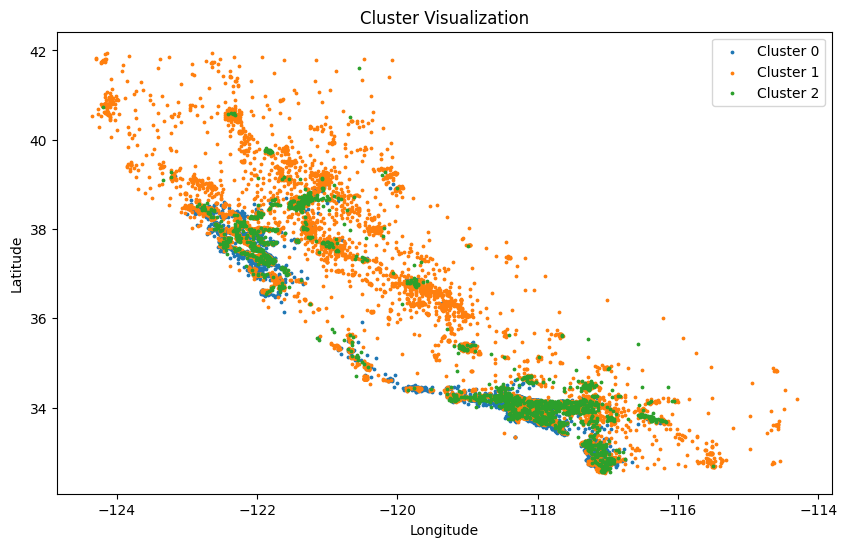

In [7]:
# Visualización: Scatter plot de latitud y longitud con colores por cluster
plt.figure(figsize=(10, 6))
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {label}', s=3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



In [ ]:
# Comentario sobre los resultados:

# Vemos que el uso de emplear clustering jerarquico aglomerativo nos da un resultado similar a usar el algoritmo de k-Means. En
# este caso el numero optimo de clusters es 4 en vez de 3, lo cual es cohrerente ya que el numero optimo esta en el rango de 3-5 segun el digrama de indices de davies_bouldin

# En cuanto al dendograma, podemos comentar que al elegir nº optimo de clusters = 4, vemos que que existe un salto considerable de 50
# en el ultimo cluster, con lo cual se podría separar en 5 clusters. No obstante, utilizando 3 o 4 obtenemos resultados suficientemente significativos para nuestra
# agrupación de casas en zonas residenciales

"""
Cluster 3:
Características Generales: Zona residencial con casas de mayor edad y mayor alto valor medio.
Ubicación Probable: Posiblemente una zona más apartada, cercana a la playa.
Población: Moderada, con ingresos medio-altos.

Cluster 2:
Características Generales: Zona residencial con una edad moderada de casas y valor medio.
Ubicación Probable: Representa posiblemente la zona central de la ciudad, densamente poblada.
Población: Alta, con ingresos medio-altos.

Cluster 1:
Características Generales: Zona residencial dispersa en las afueras, con casas de edad moderada y valor medio.
Ubicación Probable: Zona menos densa y más dispersa, en las afueras de la ciudad.
Población: Moderada, con ingresos medios.

Cluster 4:
Características Generales: Zona residencial céntrica con casas de menor edad y valor medio alto.
Ubicación Probable: Posiblemente la zona más céntrica y densamente poblada.
Población: Alta, con ingresos medios-altos.

En resumen, los clusters sugieren una diversidad en las características de las zonas residenciales.
El Cluster 3 destaca por su ubicación apartada y casas de mayor valor, mientras que el Cluster 2 podría representar el centro de la ciudad con una alta densidad de población.
El Cluster 1 muestra una distribución más dispersa en las afueras, y el Cluster 4 parece indicar una zona céntrica densamente poblada con casas de medio alto valor.
Estas conclusiones se alinean con la información proporcionada anteriormente sobre la relación entre ingresos, valor de las casas y la ubicación geográfica.
Esta sería otra forma de separar las zonas residenciales, que concuerda con los apartados 4) y 5).

"""


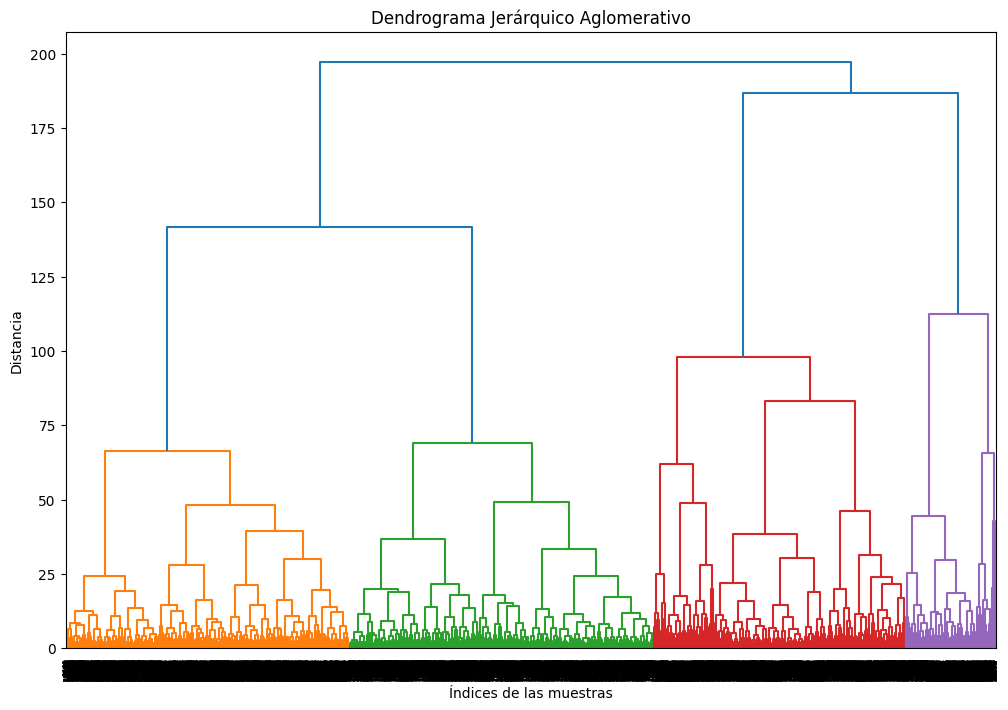

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Seleccionar un subconjunto de variables relevantes para el clustering
subset_cols = ['housing_median_age', 'total_rooms', 'median_income', 'median_house_value','population']

# Filtrar el dataframe para seleccionar solo las columnas relevantes
df_subset = df[subset_cols]

# Preprocesar los datos: estandarización usando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_subset)

# Realizar clustering jerárquico aglomerativo
linkage_matrix = linkage(scaled_data, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrograma Jerárquico Aglomerativo')
plt.xlabel('Índices de las muestras')
plt.ylabel('Distancia')
plt.show()



Cluster 3 - Descriptores Estadísticos:
       housing_median_age  total_rooms  median_income  median_house_value  \
count         5595.000000   5595.00000    5595.000000         5595.000000   
mean            30.754245   2775.36193       5.651044       338058.634316   
std             10.586713   1509.70074       2.217658       111472.898848   
min              2.000000      8.00000       0.499900        55000.000000   
25%             24.000000   1814.50000       4.132650       244750.000000   
50%             31.000000   2543.00000       5.239100       335300.000000   
75%             36.000000   3404.00000       6.613250       435000.000000   
max             52.000000  11668.00000      15.000100       500001.000000   

        population  
count  5595.000000  
mean   1275.454513  
std     669.042428  
min       3.000000  
25%     809.000000  
50%    1172.000000  
75%    1638.000000  
max    4715.000000  

Cluster 2 - Descriptores Estadísticos:
       housing_median_age  total_room

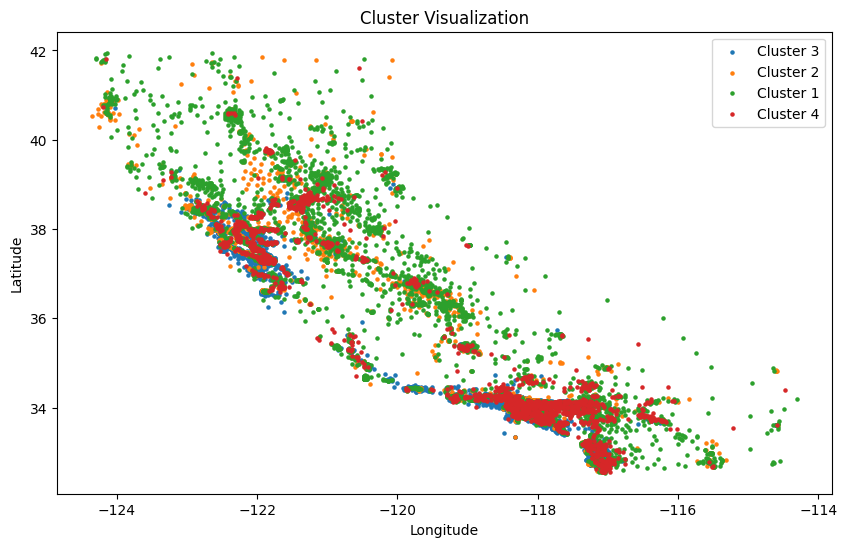

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Obtener las etiquetas de cluster para cada muestra
optimal_clusters = 4
cluster_labels = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

# Agregar las etiquetas de cluster al dataframe original
df['cluster_label'] = cluster_labels

# Describir los clusters
cluster_stats = df.groupby('cluster_label').describe()[subset_cols]

# Mostrar los descriptores estadísticos de cada cluster
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    cluster_stats = cluster_data[subset_cols].describe()

    # Mostrar la tabla de descriptores estadísticos para cada cluster
    print(f"\nCluster {label} - Descriptores Estadísticos:")
    print(cluster_stats)

# Visualización: Scatter plot de latitud y longitud con colores por cluster
plt.figure(figsize=(10, 6))
for label in df['cluster_label'].unique():
    cluster_data = df[df['cluster_label'] == label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {label}', s= 5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.legend()
plt.show()
